# Analyzing images of disturbed lines

## Initialization

In [9]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid_tools as vt
import py.metrics_disturb as me
from py.tools.imshow import imshow
import matplotlib.pyplot as plt
import py.file_handling as fh
import pandas as pd
LOGGERDEFINED = logs.openLog('still_measure.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# measure videos

measure all videos

In [ ]:
errorFolders = me.measureFolders(os.path.join(cfg.path.server, r'singleDisturb'), overwrite=True)
errorFolders

In [120]:
errorFolders

[]

In [118]:
fh.openExplorer(folder)

## xs

#### individual folders

singleDisturb\mineral_LapRD_visc\I_M9_S_4.00\I_M9_S_4.00_220930\disturbXS_+z_0.875,disturbXS_+z_0.875_vstill_HOx_l3do_I_M9_S_4.00_220930_160711_5.png,41,55


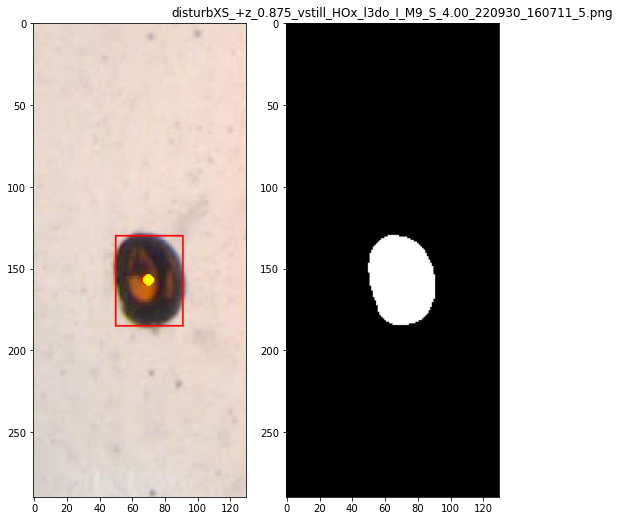

In [88]:
fstr = r'singleDisturb\mineral_LapRD_visc\I_M9_S_4.00\I_M9_S_4.00_220930\disturbXS_+z_0.875'
fistr = 'disturbXS_+z_0.875_vstill_HOx_l3do_I_M9_S_4.00_220930_160711_5.png'
folder = os.path.join(cfg.path.server, fstr)
file = os.path.join(folder, fistr)
d,u = me.xsDisturbMeasure(file, diag=1)
if 'w' in d:
    w = d['w']
    h = d['h']
else:
    w = -1
    h = -1
print(f'{fstr},{fistr},{w},{h}')

INFO: Exported \\cfs2e.nist.gov\642\internal\3D Printing Lab\Shopbot\videos\singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbXS_+y_1.250\disturbXS_+y_1.250_xsMeasure_I_3.00_S_2.50_220928_163204_6.csv


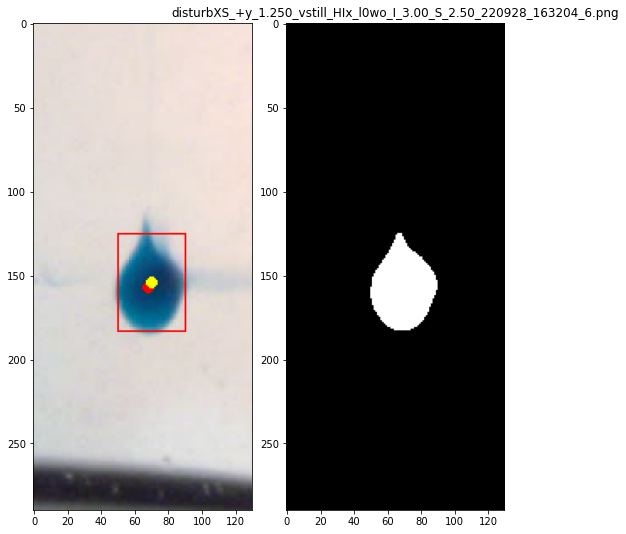

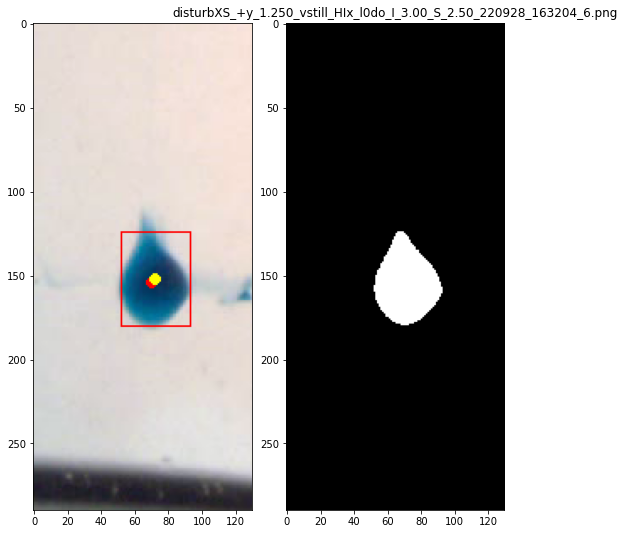

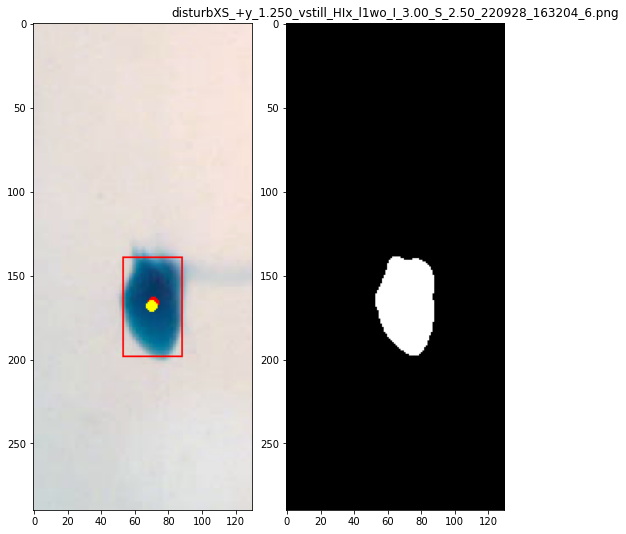

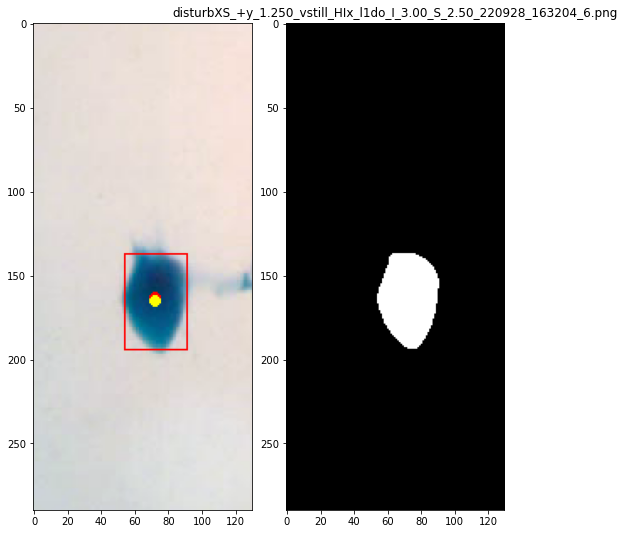

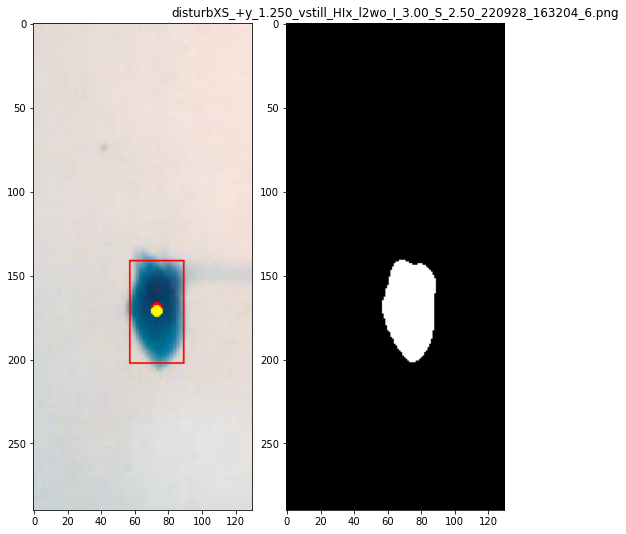

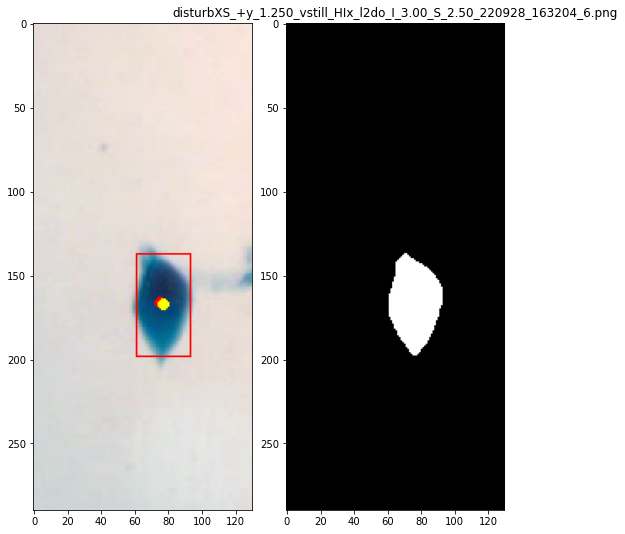

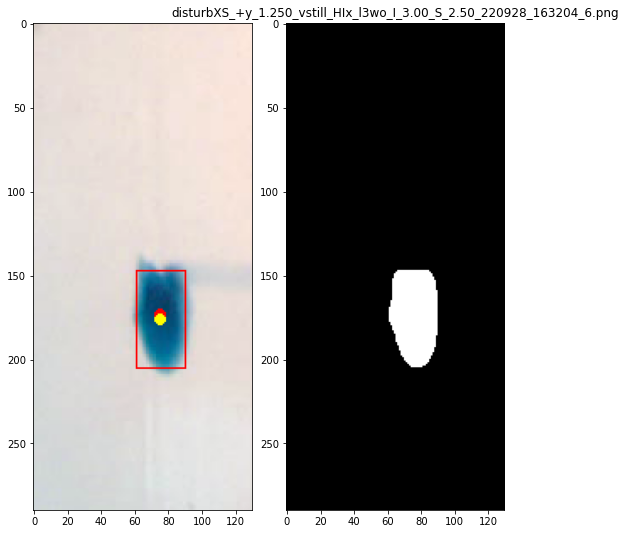

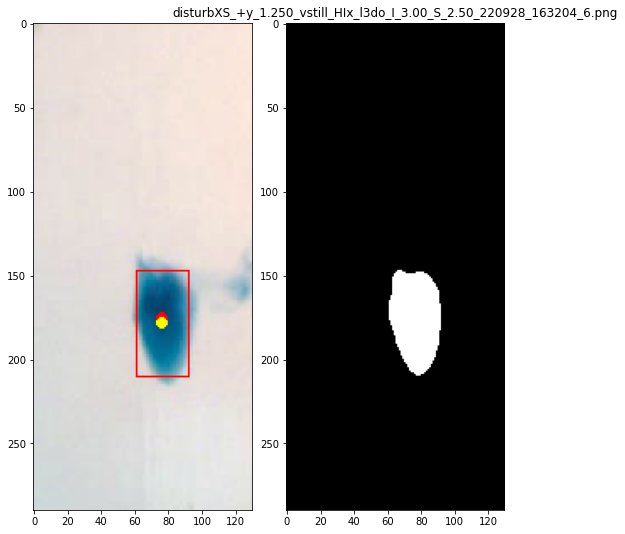

In [13]:
me.xsDisturbMeasures(r'\\cfs2e.nist.gov\642\internal\3D Printing Lab\Shopbot\videos\singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbXS_+y_1.250', overwrite=True, diag=1)

### unit test

In [89]:
run ../../tests/test_disturbXS

..............................

[]



----------------------------------------------------------------------
Ran 30 tests in 7.320s

OK


In [65]:
cdir = os.path.dirname(os.path.abspath(os.path.join('..')))
testcsv = os.path.join(cdir, 'tests', 'test_disturbXS.csv')
testlist = pd.read_csv(testcsv, dtype={'folder':'str', 'file':'str', 'w':'int', 'h':'int'})

{'i': 8, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.50\\I_3.00_S_2.50_220928\\disturbXS_+z_1.000', 'file': 'disturbXS_+z_1.000_vstill_HOx_l3do_I_3.00_S_2.50_220928_163729_2.png', 'w': 36, 'h': 66, 'w0': 38, 'h0': 71}


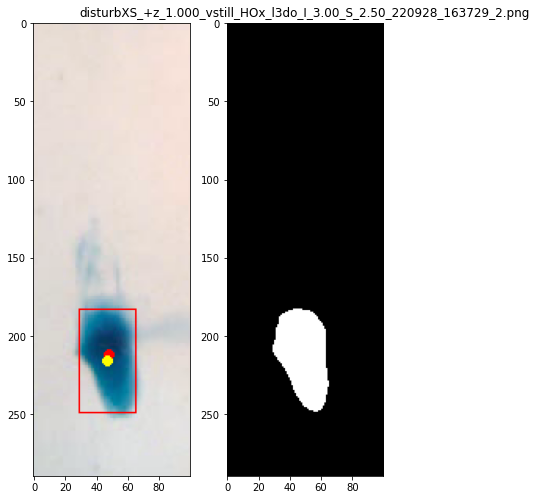

In [66]:
# folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_0.500')
# file = os.path.join(folder, 'disturbVert_0.500_vstill_V_l1do_I_3.00_S_2.50_220928_160239_6.png')
# i = 17
for i in [8]:
    folder = os.path.join(cfg.path.server, testlist.loc[i, 'folder'])
    file = os.path.join(folder, testlist.loc[i, 'file'])
    d,u = me.xsDisturbMeasure(file, diag=1)
    if 'w' in d:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':d['w'], 'h':d['h'], 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})
    else:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':0, 'h':0, 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})

### summary

In [5]:
fstr = r'singleDisturb\mineral_LapRD_visc\I_M8_S_4.00\I_M8_S_4.00_220930\disturbXS_+z_0.750'
folder = os.path.join(cfg.path.server, fstr)
me.xsDisturbSummary(folder, overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\mineral_LapRD_visc\I_M8_S_4.00\I_M8_S_4.00_220930\disturbXS_+z_0.750\disturbXS_+z_0.750_xsSummary_I_M8_S_4.00_220930_143649_5.csv


({'printFolder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\\mineral_LapRD_visc\\I_M8_S_4.00\\I_M8_S_4.00_220930\\disturbXS_+z_0.750',
  'bn': 'I_M8_S_4.00_220930',
  'date': 220930,
  'sigma': 42.1,
  'fluFile': True,
  'calibFile': True,
  'spacing': 0.75,
  'vRatio': 1.0,
  'dEst': 0.603,
  'viscRatio': 0.06785179111784158,
  'rGrav': -14852394.619184252,
  'int_Re': 0.00044863715425788933,
  'ReRatio': 8.338748885944907,
  'hDragP': 341.6800902374828,
  'vDragP': 1548.756080058196,
  'int_CaInv': 0.35964417490125533,
  'pressureCh0': 83865.90865972993,
  'ink_shortname': 'M8',
  'ink_days': 1,
  'ink_rheModifier': 'fumed silica',
  'ink_surfactant': '',
  'ink_dye': 'red',
  'ink_var': 'w% silica',
  'ink_val': 8.0,
  'ink_base': 'mineral oil',
  'ink_type': 'mineral oil',
  'ink_tau0': 1.06182,
  'ink_eta0': 23.3558111111111,
  'ink_density': 0.8709375,
  'ink_v': 10.0,
  'ink_rate': 16.58374792703151,
  'ink_visc0': 0.7942740645932702,
  'ink_CaIn

In [6]:
me.xsDisturbSummaries(os.path.join(cfg.path.server, 'singleDisturb'), os.path.join(cfg.path.fig, 'singleDisturb'), overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbXS_+y_0.500\disturbXS_+y_0.500_xsSummary_I_3.00_S_2.25_220928_172306_2.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbXS_+y_0.625\disturbXS_+y_0.625_xsSummary_I_3.00_S_2.25_220928_172415_0.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbXS_+y_0.750\disturbXS_+y_0.750_xsSummary_I_3.00_S_2.25_220928_172527_3.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbXS_+y_0.875\disturbXS_+y_0.875_xsSummary_I_3.00_S_2.25_220928_172629_5.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_vi

## vert

### individual folders

INFO: Threshold: 190, product: 31.014319111630627, white:80
{}
{'w': 0, 'h': 0}


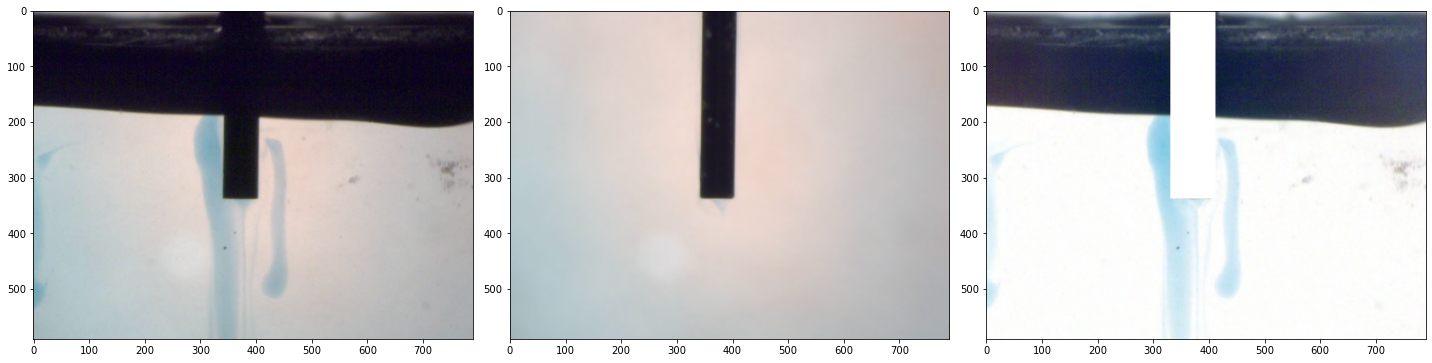

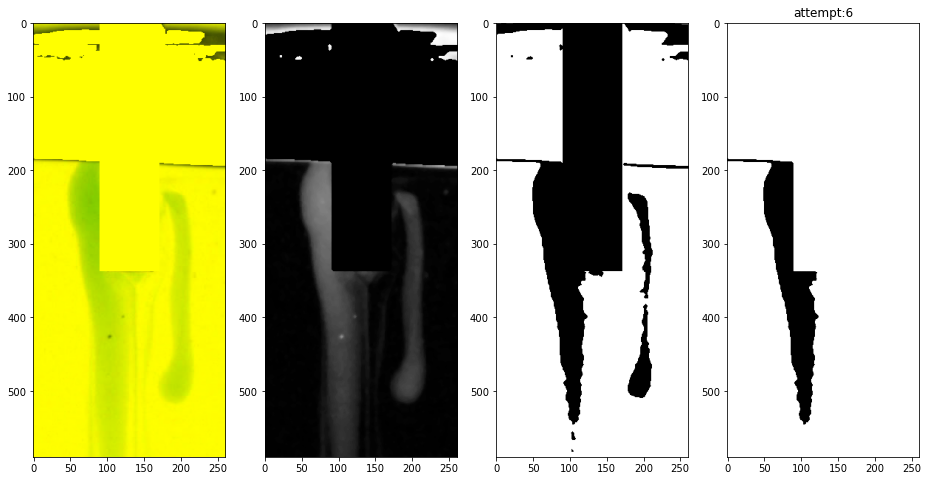

In [12]:
folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_1.250')
file = os.path.join(folder, 'disturbVert_1.250_vstill_V_l1d_I_3.00_S_2.50_220928_162434_6.png')
d,u = me.vertDisturbMeasure(file, diag=3)
print(d)
if 'w' in d:
    print({'w':d['w'], 'h':d['h']})
else:
    print({ 'w':0, 'h':0})

### unit test

In [11]:
run ../../tests/test_disturbVert

.................................

[]



----------------------------------------------------------------------
Ran 33 tests in 21.347s

OK


In [10]:
fh.openExplorer(cdir)

In [5]:
cdir = os.path.dirname(os.path.abspath(os.path.join('..')))
testcsv = os.path.join(cdir, 'tests', 'test_disturbVert.csv')
testlist = pd.read_csv(testcsv, dtype={'folder':'str', 'file':'str', 'w':'int', 'h':'int'})

{'i': 24, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.25\\I_3.00_S_2.25_220928_v1\\disturbVert_0.750', 'file': 'disturbVert_0.750_vstill_V_l2do_I_3.00_S_2.25_220928_152907_9.png', 'w': 107, 'h': 277, 'w0': 92, 'h0': 272}
{'i': 27, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.25\\I_3.00_S_2.25_220928_v1\\disturbVert_0.750', 'file': 'disturbVert_0.750_vstill_V_l0wo_I_3.00_S_2.25_220928_152907_9.png', 'w': 110, 'h': 250, 'w0': 98, 'h0': 247}
{'i': 28, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.25\\I_3.00_S_2.25_220928_v2\\disturbVert_0.750', 'file': 'disturbVert_0.750_vstill_V_l2d_I_3.00_S_2.25_220928_153448_4.png', 'w': 92, 'h': 405, 'w0': 66, 'h0': 404}


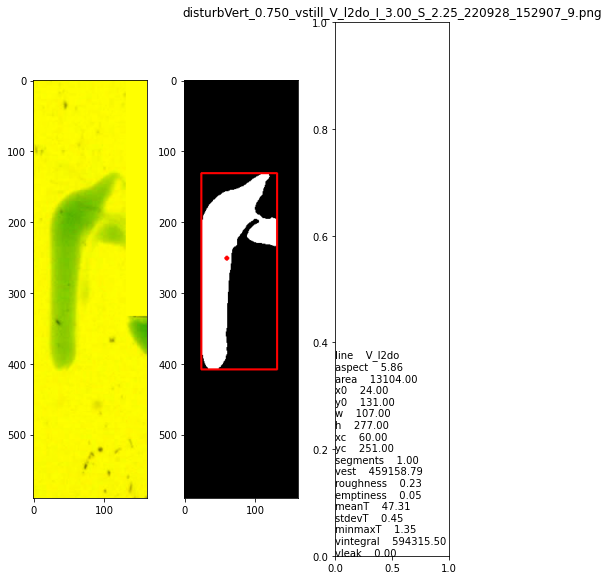

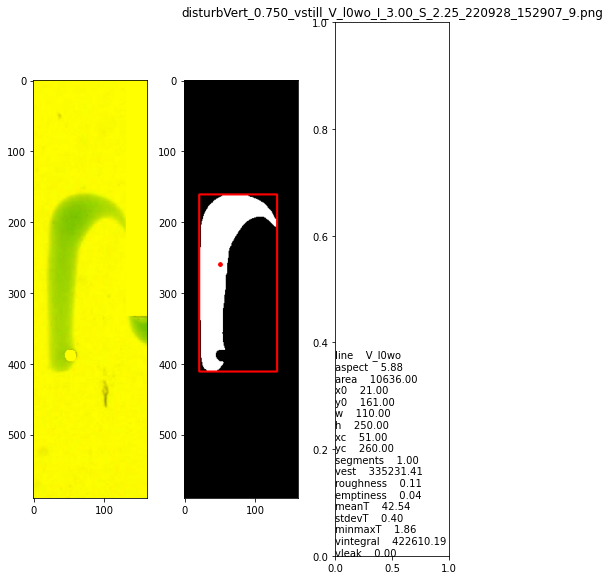

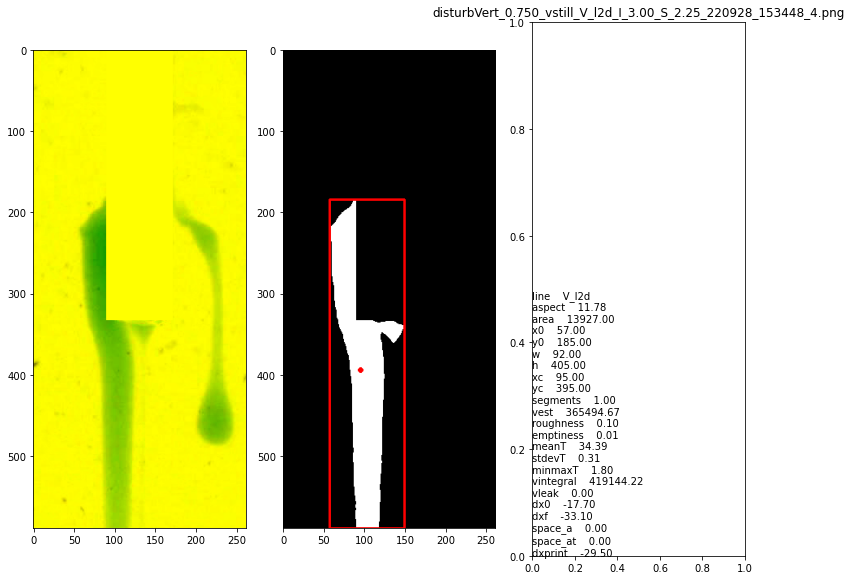

In [9]:
# folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_0.500')
# file = os.path.join(folder, 'disturbVert_0.500_vstill_V_l1do_I_3.00_S_2.50_220928_160239_6.png')
# i = 17
for i in [24, 27, 28]:
    folder = os.path.join(cfg.path.server, testlist.loc[i, 'folder'])
    file = os.path.join(folder, testlist.loc[i, 'file'])
    d,u = me.vertDisturbMeasure(file, diag=1)
    if 'w' in d:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':d['w'], 'h':d['h'], 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})
    else:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file'], 'w':0, 'h':0, 'w0':testlist.loc[i,'w'], 'h0':testlist.loc[i, 'h']})

In [11]:
me.vertDisturbMeasures(os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_1.250'), overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_1.250\disturbVert_1.250_vertMeasure_I_3.00_S_2.50_220928_162434_6.csv


### summary

In [15]:
me.vertDisturbSummary(os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_1.250'), overwrite=True)

({'printFolder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.50\\I_3.00_S_2.50_220928\\disturbVert_1.250',
  'bn': 'I_3.00_S_2.50_220928',
  'date': 220928,
  'sigma': 0.0,
  'fluFile': True,
  'calibFile': True,
  'spacing': 1.25,
  'vRatio': 1.0,
  'dEst': 0.603,
  'viscRatio': 2.0212543247005668,
  'rGrav': 1725659.2339367631,
  'int_Re': 0.0065670212667642775,
  'ReRatio': 0.33774867278269843,
  'hDragP': 27.490546982825812,
  'vDragP': 124.6082315015331,
  'int_CaInv': 0.0,
  'pressureCh0': 41331.902701343584,
  'ink_shortname': '3.00',
  'ink_days': 1,
  'ink_rheModifier': 'Laponite RD',
  'ink_surfactant': '',
  'ink_dye': 'blue',
  'ink_var': 'w% Laponite RD',
  'ink_val': 3.0,
  'ink_base': 'water',
  'ink_type': 'water',
  'ink_tau0': 1.99546499999999,
  'ink_eta0': 21.8268454545454,
  'ink_density': 1.0257083333333332,
  'ink_v': 10.0,
  'ink_rate': 16.58374792703151,
  'ink_visc0': 1.9036790718491434,
  'ink_CaIn

In [15]:
me.vertDisturbSummaries(os.path.join(cfg.path.server, 'singleDisturb'), os.path.join(cfg.path.fig, 'singleDisturb'), overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbVert_0.500\disturbVert_0.500_vertSummary_I_3.00_S_2.25_220928_171622_2.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbVert_0.625\disturbVert_0.625_vertSummary_I_3.00_S_2.25_220928_171726_2.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbVert_0.750\disturbVert_0.750_vertSummary_I_3.00_S_2.25_220928_171824_6.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbVert_0.875\disturbVert_0.875_vertSummary_I_3.00_S_2.25_220928_171921_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_vi

### horiz

### individual files

INFO: Threshold: 60, product: 115.0411633974297, white:80
singleDisturb\mineral_LapRD_visc\I_M8_S_4.00\I_M8_S_4.00_220930\disturbHoriz2_0.500,disturbHoriz2_0.500_vstill_HOh_l3d_I_M8_S_4.00_220930_142130_5.png,-1,-1,-1


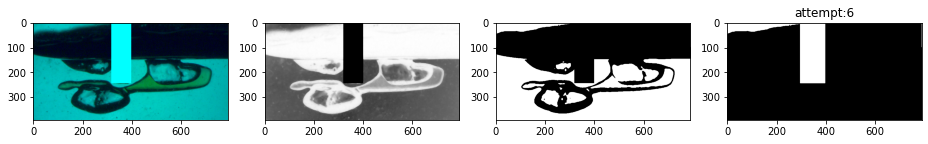

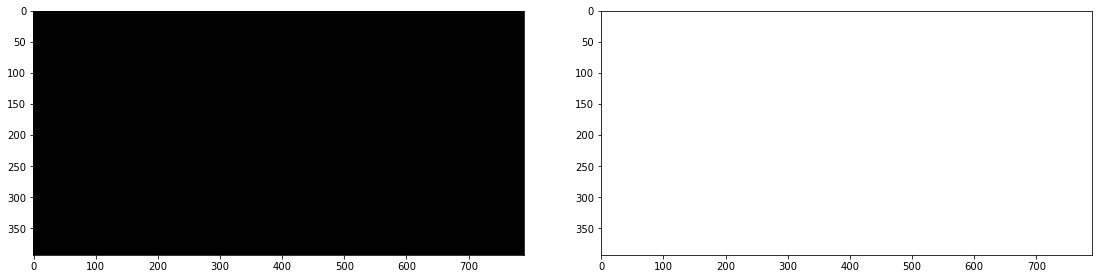

In [46]:
fstr = r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928_v1\disturbHoriz_0.625'
fistr = 'disturbHoriz2_0.500_vstill_HOh_l3d_I_M8_S_4.00_220930_142130_5.png'
folder = os.path.join(cfg.path.server, fstr)
file = os.path.join(folder, fistr)
d,u = me.horizDisturbMeasure(file, diag=2)
if 'segments' in d:
    segments = d['segments']
    totlen = int(d['totlen'])
    meanT = int(d['meanT'])
else:
    segments=-1
    totlen=-1
    meanT=-1
print(f'{fstr},{fistr},{segments},{totlen},{meanT}')

### unit test

In [19]:
run ../../tests/test_disturbHoriz

....................

[]



----------------------------------------------------------------------
Ran 20 tests in 16.612s

OK


In [21]:
cdir = os.path.dirname(os.path.abspath(os.path.join('..')))
testcsv = os.path.join(cdir, 'tests', 'test_disturbHoriz.csv')
testlist = pd.read_csv(testcsv, dtype={'folder':'str', 'file':'str', 'w':'int', 'h':'int'})

INFO: Threshold: 190, product: 26.955406319451154, white:80
{'i': 15, 'folder': 'singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.50\\I_3.00_S_2.50_220928\\disturbHoriz_0.625', 'file': 'disturbHoriz_0.625_vstill_HOh_l2d_I_3.00_S_2.50_220928_155114_2.png', 'segments': 1, 'totlen': 582, 'meanT': 34.97766323024055, 'segments0': 1, 'totlen0': 582, 'meanT0': 34}


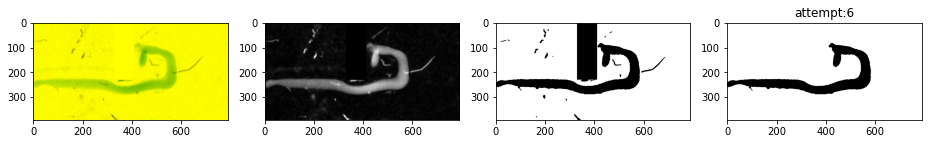

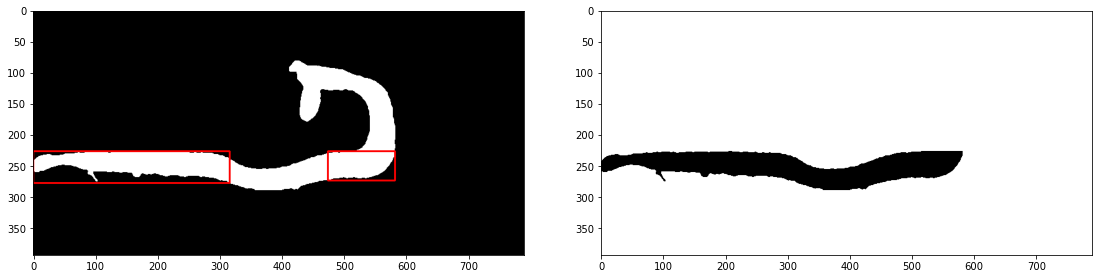

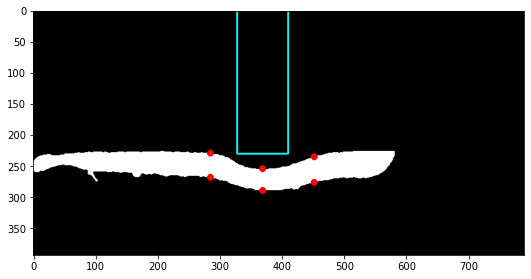

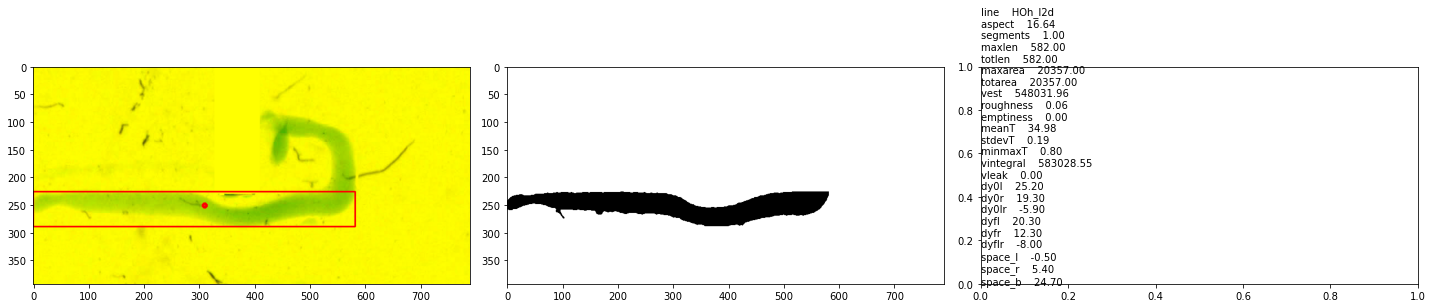

In [33]:
# folder = os.path.join(cfg.path.server, r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_0.500')
# file = os.path.join(folder, 'disturbVert_0.500_vstill_V_l1do_I_3.00_S_2.50_220928_160239_6.png')
# i = 17
for i in [15]:
    folder = os.path.join(cfg.path.server, testlist.loc[i, 'folder'])
    file = os.path.join(folder, testlist.loc[i, 'file'])
    d,u = me.horizDisturbMeasure(file, diag=2)
    if 'segments' in d:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file']
               , 'segments':d['segments'], 'totlen':d['totlen'], 'meanT':d['meanT']
               , 'segments0':testlist.loc[i,'segments'], 'totlen0':testlist.loc[i, 'totlen'], 'meanT0':testlist.loc[i, 'meanT']})
    else:
        print({'i':i, 'folder':testlist.loc[i,'folder'], 'file':testlist.loc[i,'file']
               , 'segments':0, 'totlen':0, 'meanT':0
               , 'segments0':testlist.loc[i,'segments'], 'totlen0':testlist.loc[i, 'totlen'], 'meanT0':testlist.loc[i, 'meanT']})

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\mineral_LapRD_visc\I_M8_S_4.00\I_M8_S_4.00_220930\disturbHoriz2_0.750\disturbHoriz2_0.750_horizMeasure_I_M8_S_4.00_220930_142253_4.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\mineral_LapRD_visc\I_M8_S_4.00\I_M8_S_4.00_220930\disturbHoriz2_0.750\disturbHoriz2_0.750_horizSummary_I_M8_S_4.00_220930_142253_4.csv


({'printFolder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\\mineral_LapRD_visc\\I_M8_S_4.00\\I_M8_S_4.00_220930\\disturbHoriz2_0.750',
  'bn': 'I_M8_S_4.00_220930',
  'date': 220930,
  'sigma': 42.1,
  'fluFile': True,
  'calibFile': True,
  'spacing': 0.75,
  'vRatio': 1.0,
  'dEst': 0.603,
  'viscRatio': 0.06785179111784158,
  'rGrav': -14852394.619184252,
  'int_Re': 0.00044863715425788933,
  'ReRatio': 8.338748885944907,
  'hDragP': 341.6800902374828,
  'vDragP': 1548.756080058196,
  'int_CaInv': 0.35964417490125533,
  'pressureCh0': 83865.90865972993,
  'ink_shortname': 'M8',
  'ink_days': 1,
  'ink_rheModifier': 'fumed silica',
  'ink_surfactant': '',
  'ink_dye': 'red',
  'ink_var': 'w% silica',
  'ink_val': 8.0,
  'ink_base': 'mineral oil',
  'ink_type': 'mineral oil',
  'ink_tau0': 1.06182,
  'ink_eta0': 23.3558111111111,
  'ink_density': 0.8709375,
  'ink_v': 10.0,
  'ink_rate': 16.58374792703151,
  'ink_visc0': 0.7942740645932702,
  'ink_CaI

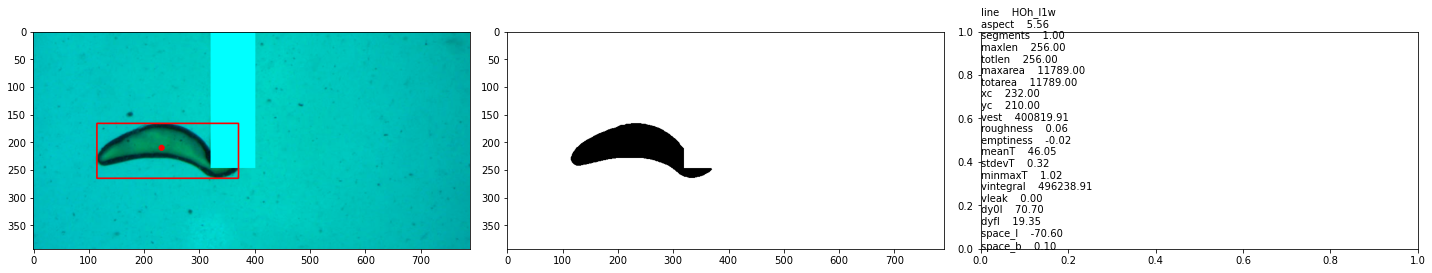

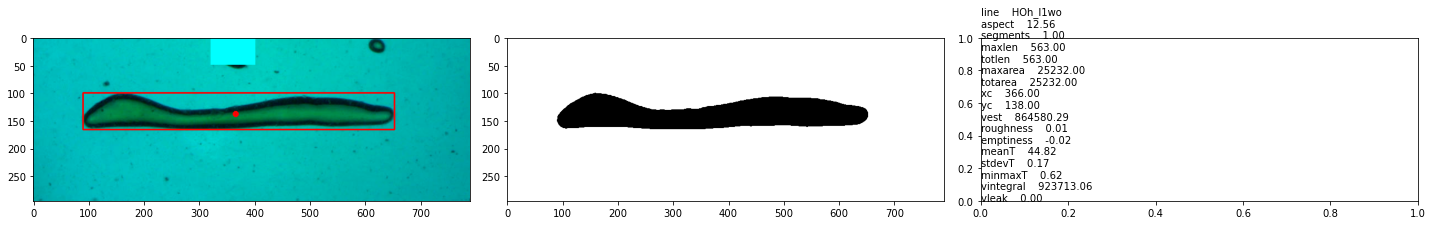

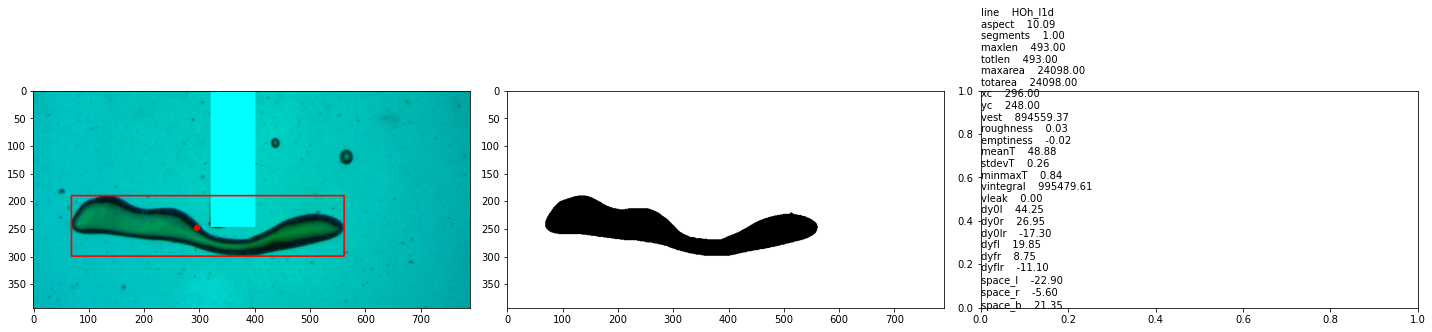

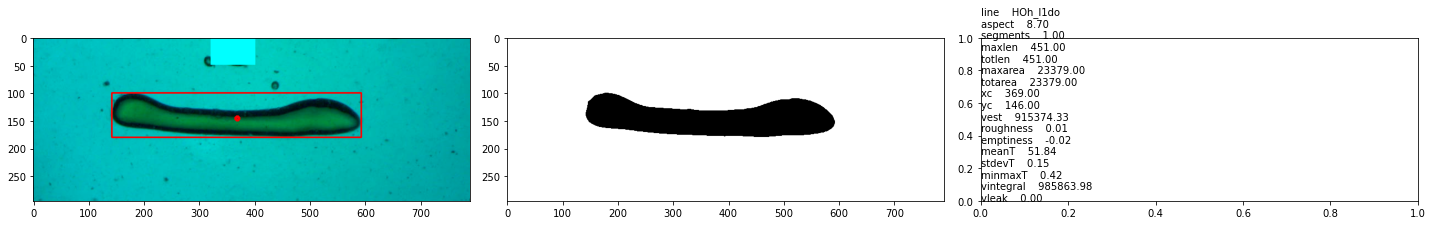

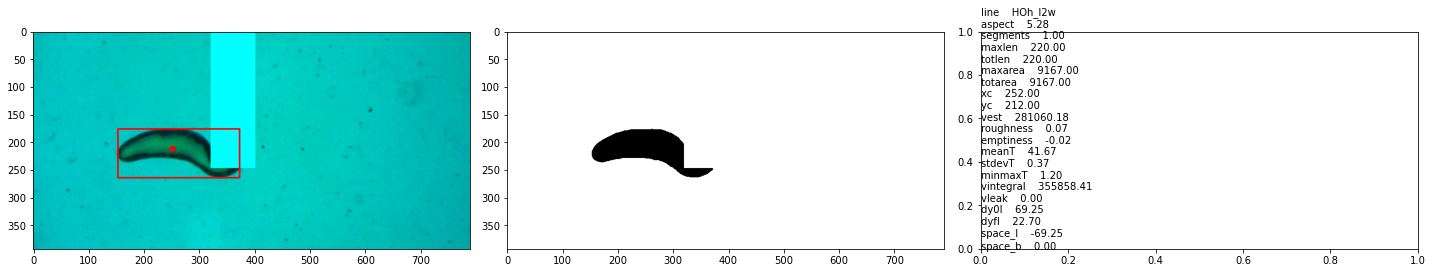

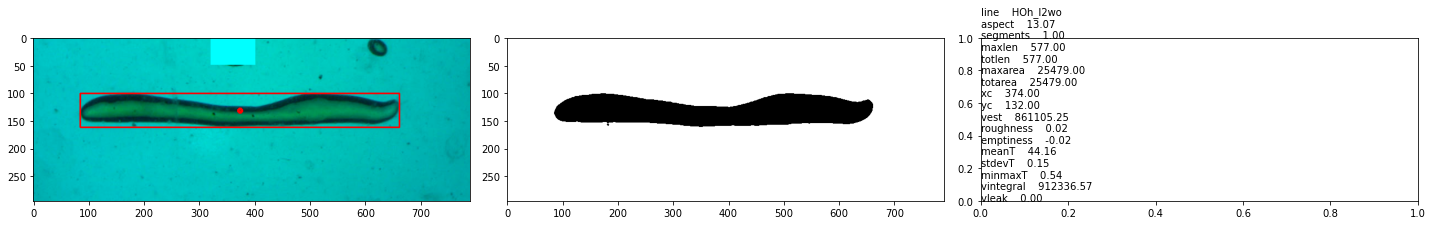

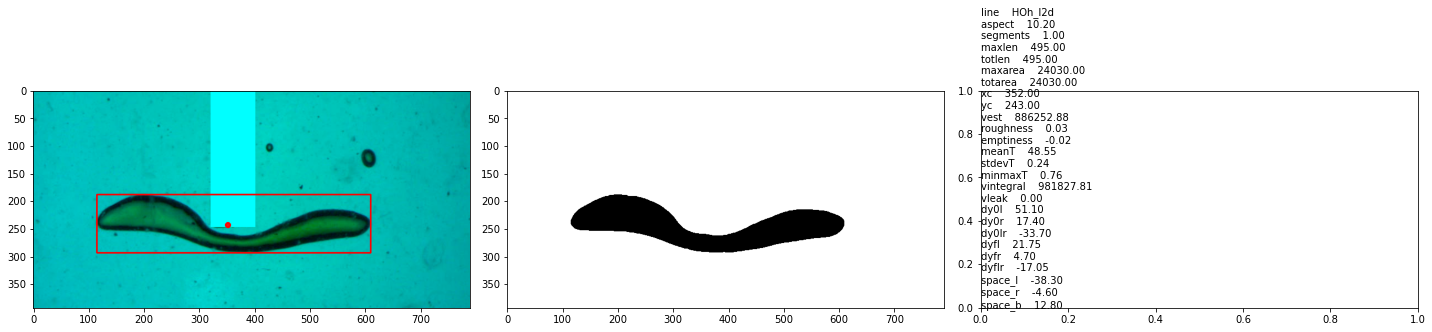

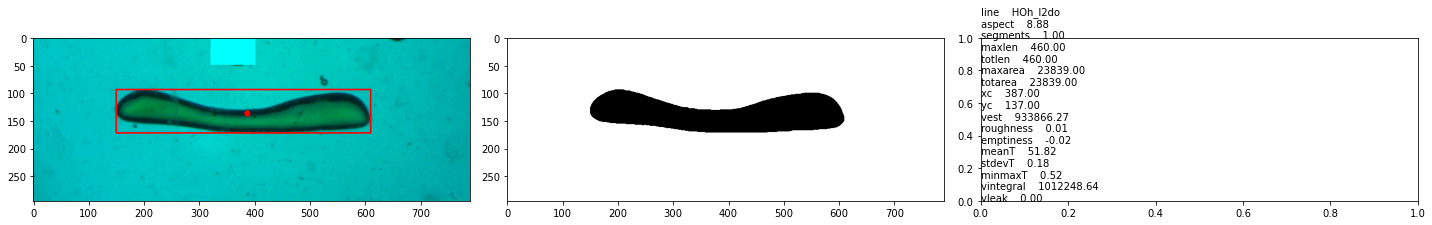

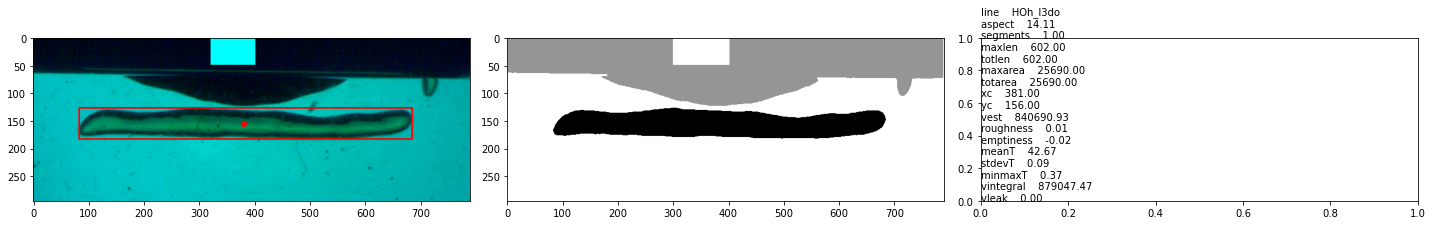

In [25]:
fstr =  r'singleDisturb\mineral_LapRD_visc\I_M8_S_4.00\I_M8_S_4.00_220930\disturbHoriz2_0.750'
folder = os.path.join(cfg.path.server, fstr)
me.horizDisturbMeasures(folder, overwrite=True, diag=1)
me.horizDisturbSummary(folder, overwrite=True)

## summary

In [12]:
fstr = r'singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbHoriz_0.500'
folder = os.path.join(cfg.path.server, fstr)
me.horizDisturbSummary(folder, overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbHoriz_0.500\disturbHoriz_0.500_horizSummary_I_3.00_S_2.50_220928_155034_3.csv


({'printFolder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\\LapRD_LapRD_visc\\I_3.00_S_2.50\\I_3.00_S_2.50_220928\\disturbHoriz_0.500',
  'bn': 'I_3.00_S_2.50_220928',
  'date': 220928,
  'sigma': 0.0,
  'fluFile': True,
  'calibFile': True,
  'spacing': 0.5,
  'vRatio': 1.0,
  'dEst': 0.603,
  'viscRatio': 2.0212543247005668,
  'rGrav': 1725659.2339367631,
  'int_Re': 0.0065670212667642775,
  'ReRatio': 0.33774867278269843,
  'hDragP': 27.490546982825812,
  'vDragP': 124.6082315015331,
  'int_CaInv': 0.0,
  'pressureCh0': 41331.92832072861,
  'ink_shortname': '3.00',
  'ink_days': 1,
  'ink_rheModifier': 'Laponite RD',
  'ink_surfactant': '',
  'ink_dye': 'blue',
  'ink_var': 'w% Laponite RD',
  'ink_val': 3.0,
  'ink_base': 'water',
  'ink_type': 'water',
  'ink_tau0': 1.99546499999999,
  'ink_eta0': 21.8268454545454,
  'ink_density': 1.0257083333333332,
  'ink_v': 10.0,
  'ink_rate': 16.58374792703151,
  'ink_visc0': 1.9036790718491434,
  'ink_CaInv

In [26]:
me.horizDisturbSummaries(os.path.join(cfg.path.server, 'singleDisturb')
                         , os.path.join(cfg.path.fig, 'singleDisturb'), overwrite=False)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\singleDisturb\horizDisturbSummaries.csv
